# NETFLIX


1.Defining Problem Statement and Analysing basic metrics

2.Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

3.Non-Graphical Analysis: Value counts and unique attributes

4.Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis

4.2 For categorical variable(s): Boxplot

4.3 For correlation: Heatmaps, Pairplots

5.Missing Value & Outlier check (Treatment optional)

6.Insights based on Non-Graphical and Visual Analysis

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7.Business Insights - Should include patterns observed in the data along with what you can infer from it

8.Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

In [ ]:
# Import necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('netflix.csv')

In [ ]:
# Getting start on dataset (Display top 5 rows)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Information on datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Observations on the shape of dataset(No. of rows and columns)
df.shape

(8807, 12)

In [ ]:
# Data types of all the attributes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Check for null values in the DataFrame
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Check for missing values
df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Dropping rows with missing values
df.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Filling missing values with mean
df.fillna(df.mean())

/var/folders/59/tqvzyn1131bcxw0ry486jh0w0000gn/T/ipykernel_21168/2227363568.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Value counts of a specific column
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
df.release_year.value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
# Unique attributes of a specific column
df.director.unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Data Preprocessing
# Encode categorical columns
def label_encode_columns(dataframe, columns):
    for col in columns:
        labels, uniques = pd.factorize(dataframe[col])
        dataframe[col] = labels
    return dataframe
categorical_columns = ['type','rating']

In [ ]:
#Mapping genres
mapping_genres_dict ={'Documentaries':'Documentaries',
                    'British TV Shows': 'International',
                    'International TV Shows':'International',
                    'Crime TV Shows':'Crime',
                    'Docuseries':'Documentaries',
                    'TV Dramas':'Dramas',
                    'Children & Family Movies':'Children & Family Movies',
                    'Dramas':'Dramas',
                    'Comedies':'Comedies',
                    'TV Comedies':'Comedies',
                    'Thrillers':'Thrillers',
                    'TV Thrillers':'Thrillers',
                    'Horror Movies':'Horror',
                    "Kids' TV":"Kids' TV",
                    'Action & Adventure':'Action & Adventure',
                    'Reality TV':'Reality TV',
                    'Anime Series':'Anime',
                    'International Movies':'International',
                    'Sci-Fi & Fantasy':'Sci-Fi & Fantasy',
                    'Classic Movies':'Classic',
                    'TV Shows':'TV Shows',
                    'Stand-Up Comedy':'Stand-Up Comedy & Talk Shows',
                    'TV Action & Adventure':'Action & Adventure',
                    'Movies':'Movies',
                    'Korean TV Shows':'International',
                    'Stand-Up Comedy & Talk Shows':'Stand-Up Comedy & Talk Shows',
                    'Classic & Cult TV':'Classic',
                    'Anime Features':'Anime',
                    'Cult Movies':'Cult',
                    'Classic Movies':'Classic',
                    'Independent Movies':'Independent Movies',
                    'TV Horror':'Horror',
                    'Music & Musicals':'Music & Musicals',
                    'LGBTQ Movies':'LGBTQ',
                    'Sports Movies':'Sport',
                    'Spanish-Language TV Shows':'International',
                    'Romantic TV Shows':'Romantic',
                    'Romantic Movies':'Romantic',
                    'TV Action & Adventure':'Action & Adventure',
                    'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
                    'International TV Shows':'International',
                    'Faith & Spirituality':'Faith & Spirituality',
                    'Science & Nature TV':'Science & Nature'
                    }
df['listed_in']=df['listed_in'].map(mapping_genres_dict)

In [ ]:
# Analysis on top 30 director
documentaries_df = df[df['listed_in'] == 'Documentaries']
director_counts = documentaries_df['director'].value_counts()
top_30_directors = director_counts.head(30)
documentaries_top_30_directors = documentaries_df[documentaries_df['director'].isin(top_30_directors.index)]

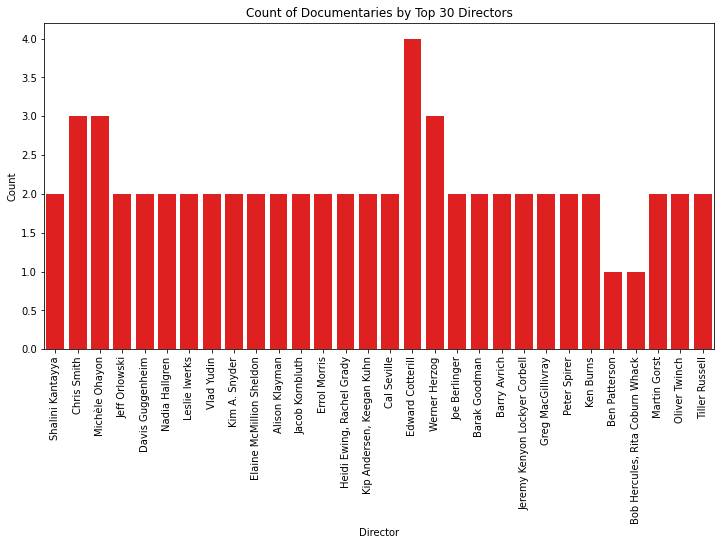

In [ ]:
# Count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='director', data=documentaries_top_30_directors,color = "red")
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Count of Documentaries by Top 30 Directors')
plt.show()

Text(0, 0.5, 'Count')

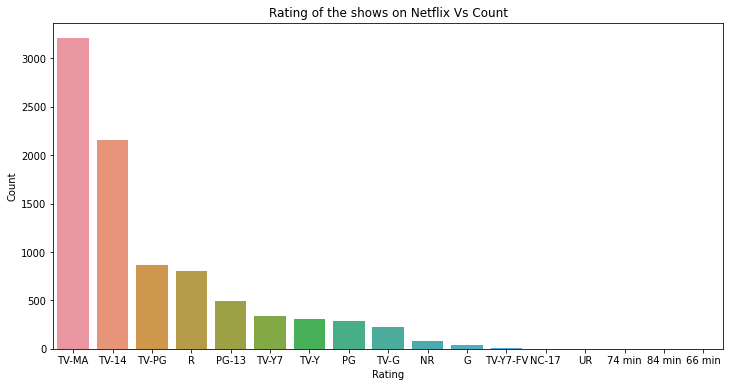

In [ ]:
# Top 30 rating
# Countplot / continuous variable
plt.figure(figsize = (12,6))
sns.countplot(x = "rating", order =df["rating"].value_counts().index[0:20],data = df)
plt.title("Rating of the shows on Netflix Vs Count")
plt.xlabel("Rating")
plt.ylabel("Count")

/var/folders/59/tqvzyn1131bcxw0ry486jh0w0000gn/T/ipykernel_21168/975459832.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['release_year'], kde=True)


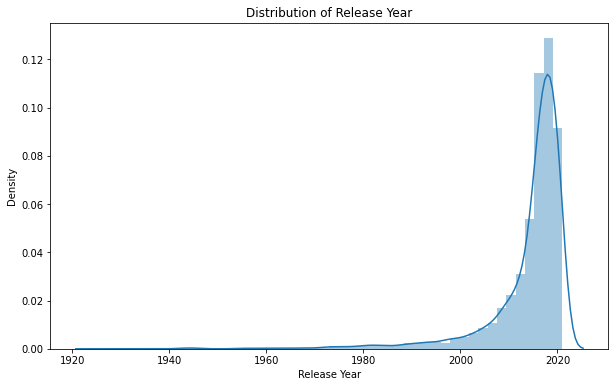

In [ ]:
# Bivariate Plots
# Distplot / continuous variable
plt.figure(figsize=(10, 6))
sns.distplot(df['release_year'], kde=True)
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.title('Distribution of Release Year')
plt.show()

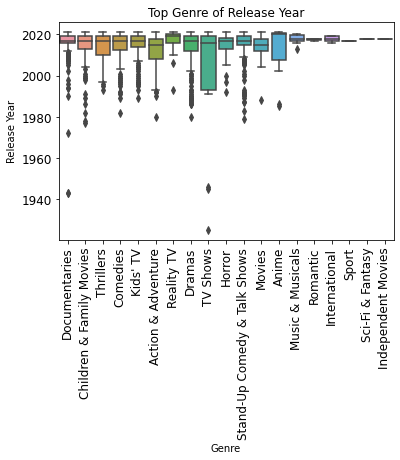

In [ ]:
# Boxplot / categorical variable
sns.boxplot(x='listed_in', y='release_year', data=df)
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top Genre of Release Year')
plt.show()

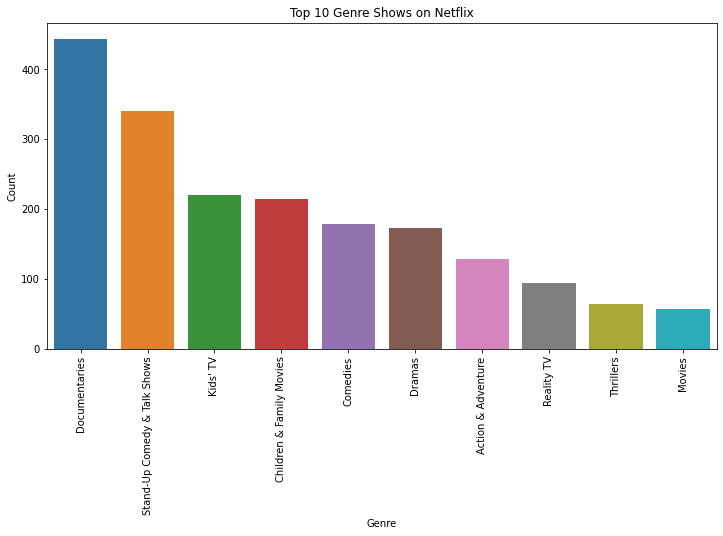

In [ ]:
# Top 10 genre shows on netflix
plt.figure(figsize=(12, 6))
sns.barplot(x=df['listed_in'].value_counts().index[:10], y=df['listed_in'].value_counts().values[:10])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genre Shows on Netflix')
plt.xticks(rotation=90)
plt.show()

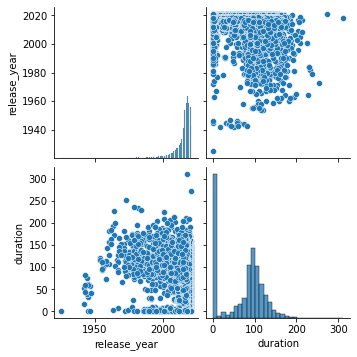

In [ ]:
# Pairplot
df['duration'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0])
sns.pairplot(df[['release_year', 'duration', 'rating']].dropna())
plt.show()

<Axes: >

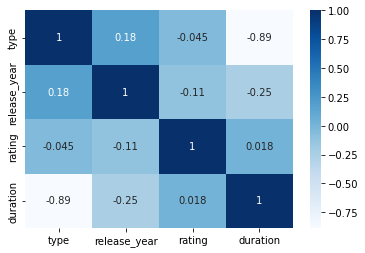

In [ ]:
# Correlation Heatmap
encoded_data = label_encode_columns(df.copy(), categorical_columns)
sns.heatmap(encoded_data.corr(), annot = True, cmap = "Blues")

<Axes: >

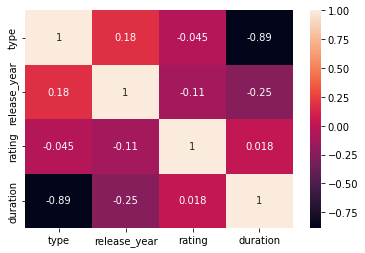

In [ ]:
sns.heatmap(encoded_data.corr(), annot = True)

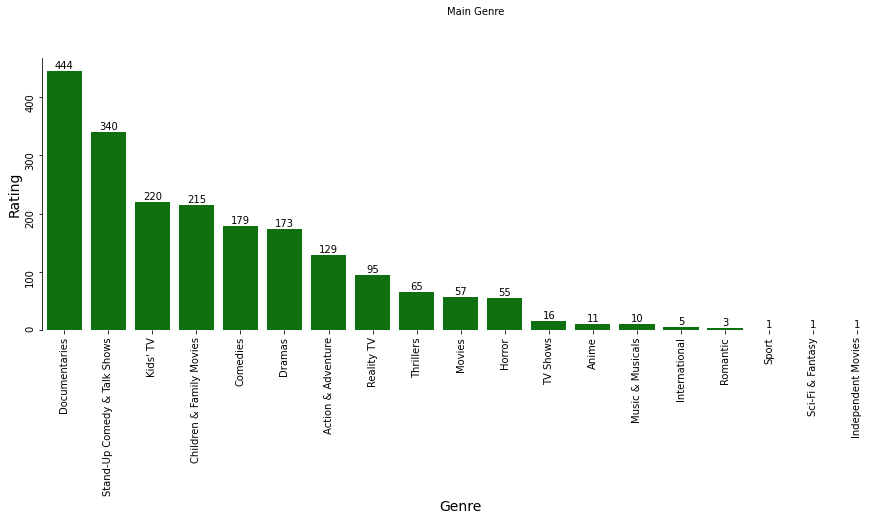

In [ ]:
#OPTIONAL ANALYSIS
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data = df, x = 'listed_in', order = df['listed_in'].value_counts().index,color='green')
ax.set_xlabel(xlabel='Genre', size=14)
ax.set_ylabel(ylabel="Rating", size=14)
ax.bar_label(ax.containers[0])
sns.despine(bottom=True)
ax.tick_params(labelrotation=90)
fig.text(0.5, 1,"Main Genre")
plt.show()

In [ ]:
# Range of attributes (optional)
attribute_ranges = encoded_data.describe().loc[['min', 'max']]
attribute_ranges

,type,release_year,rating,duration
min,0.0,1925.0,-1.0,1.0
max,1.0,2021.0,16.0,312.0


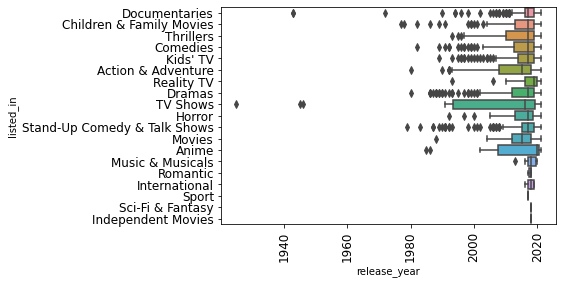

In [ ]:
# First step to outlier check
sns.boxplot(x='release_year', y='listed_in', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Outlier treatment
outlier_threshold = 1.5  # Assuming value

q1 = df['release_year'].quantile(0.25)
q3 = df['release_year'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - outlier_threshold * iqr
upper_bound = q3 + outlier_threshold * iqr

# Remove Outliers
df_cleaned = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]

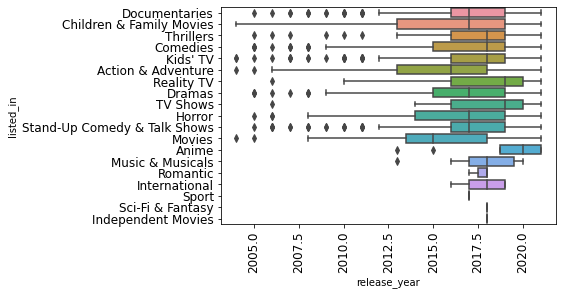

In [ ]:
sns.boxplot(x='release_year', y='listed_in', data=df_cleaned)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#Insights

Based on the patterns observed in the data, here are some business insights:

1.Shift towards Recent Releases: The data shows a significant increase in the number of movies and TV shows released in recent years. This suggests a growing trend of producing and adding new content to the platform. Netflix can capitalize on this trend by focusing on acquiring and producing fresh and engaging content to keep up with the audience's demand for new releases.

2.Focus on Movies: The dataset contains a higher count of movies compared to TV shows. This indicates that Netflix has a stronger emphasis on movie content. The company can continue to invest in acquiring popular movies, securing exclusive distribution rights, and producing original movies to cater to the preferences of their subscribers.

3.Varied Duration Preferences: The distribution of movie and TV show durations is diverse, ranging from a few minutes to several hundred minutes for movies and 1 to 10 seasons for TV shows. This suggests that viewers have diverse preferences when it comes to content duration. Netflix can continue to offer a wide range of content with varying durations to cater to different viewer preferences and increase engagement.

4.Catering to Different Audiences: The dataset includes content with various TV ratings, such as TV-MA, TV-14, TV-PG, TV-G, and R. This indicates that Netflix caters to different audience demographics and preferences. Understanding the target audience for each rating can help Netflix tailor its content acquisition and production strategies to effectively reach and engage specific viewer segments.

5.Geographic Diversity: The dataset includes movies and TV shows from various countries. Netflix can leverage this geographic diversity to cater to a global audience by offering a wide range of international content. Analyzing viewer preferences by country can help identify popular genres, languages, and cultural preferences, enabling Netflix to curate content that resonates with specific markets.

6.No Strong Attribute Correlations: The correlation analysis does not reveal any strong correlations between the numerical attributes in the dataset. This suggests that factors such as release year and duration do not have a direct linear relationship. Netflix can utilize this insight to maintain a diverse content library, considering factors beyond release year and duration when making acquisition and production decisions.

7.Adaptation to Viewer Behavior: Netflix can continuously analyze viewership data and preferences to identify patterns and trends. By understanding which genres, actors, directors, or specific types of content are popular among subscribers, the company can make informed decisions about content acquisition and production to meet viewer demands and optimize subscriber retention.

8.These business insights provide valuable guidance to Netflix in terms of content acquisition, production, and curation. By leveraging these patterns, Netflix can better understand its audience, adapt to changing trends, and continue to provide a diverse and engaging content library to drive growth and retain subscribers.




#Recommendations -

Based on the analysis and insights derived from the data, here are some actionable recommendations for Netflix:

1.Invest in producing original movies and TV shows to create unique content that sets Netflix apart from competitors.

2.Diversify the content library by expanding TV show offerings to cater to viewers who prefer episodic content.

3.Acquire and promote more international content to reach a global audience and meet the demand for localized and culturally relevant shows and movies.

4.Analyze viewer preferences and consumption patterns to make informed decisions about content acquisition and production.

5.Collaborate with popular directors and actors to attract attention and enhance the appeal of Netflix's content.

6.Strategically time the release of new TV shows, considering seasonality, competitor releases, and viewer preferences.

7.Enhance the accuracy of recommendations by improving metadata and refining recommendation algorithms.

8.Explore new genres and niche markets to diversify the content offering and attract a broader range of viewers.

9.Focus on localization efforts by providing subtitles and dubbing in multiple languages to make content more accessible to international audiences.

10.Continuously monitor viewership data, feedback, and industry trends to adapt the content strategy and stay ahead of changing viewer preferences.